In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
file_path = 'rdfwfv_test2020_RDFWFV_20201222_V10.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [250]*6
num_of_cycle = 6
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(1500, 7) (1500, 6) (6, 7) (6, 6)

!! check !! test real shape (1500, 6)
!! check !! X value ( especially its precision )

[1.14038836e-02 1.31645367e+19 1.70961252e+18 2.03493061e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]
[6.92941109e-03 1.45486129e+19 2.04199471e+18 2.99891468e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]
[1.11500611e-02 5.83810867e+20 9.06778227e+19 3.58321489e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]
[5.99569405e-03 3.11638597e+20 4.11084838e+19 3.28533776e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]
[3.18145645e-03 2.78173540e+20 1.99814564e+19 3.62751273e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]
[1.33051257e-02 2.12039947e+19 2.46494333e+18 3.61370649e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


In [19]:
min_per_out_v = test_real.min(axis=0)
max_per_out_v = test_real.max(axis=0)

factor 0
real A sample shape: (250, 6)
X input [1.14038836e-02 1.31645367e+19 1.70961252e+18 2.03493061e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


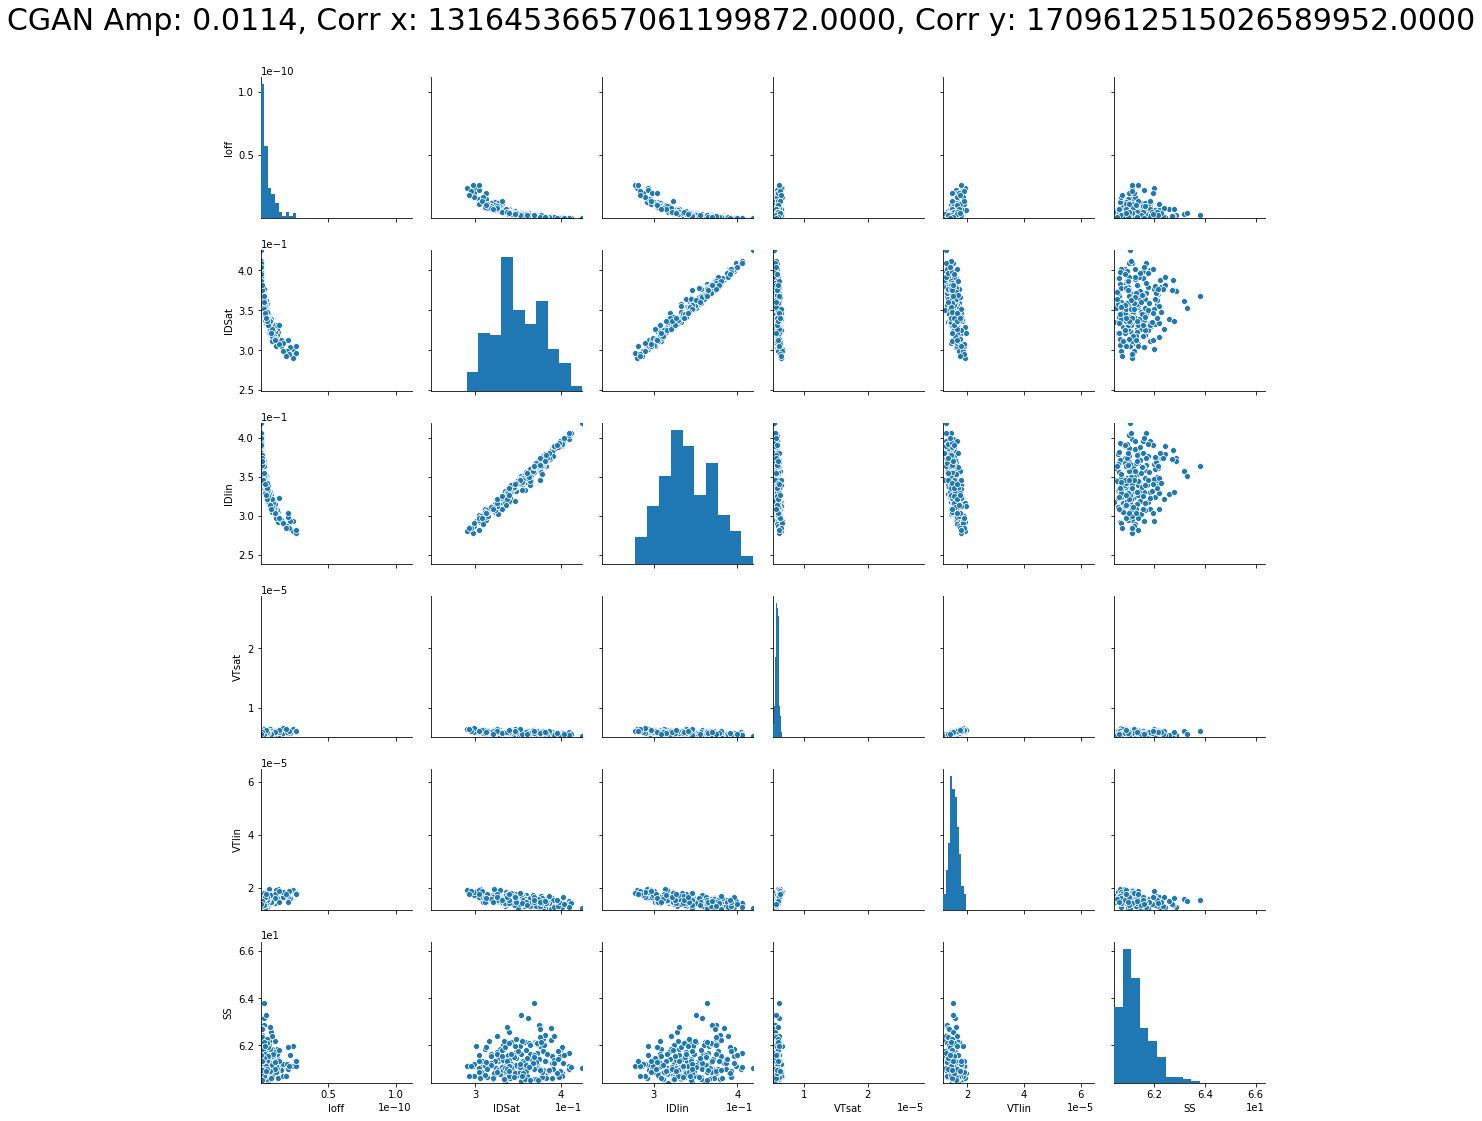

factor 1
real A sample shape: (250, 6)
X input [6.92941109e-03 1.45486129e+19 2.04199471e+18 2.99891468e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


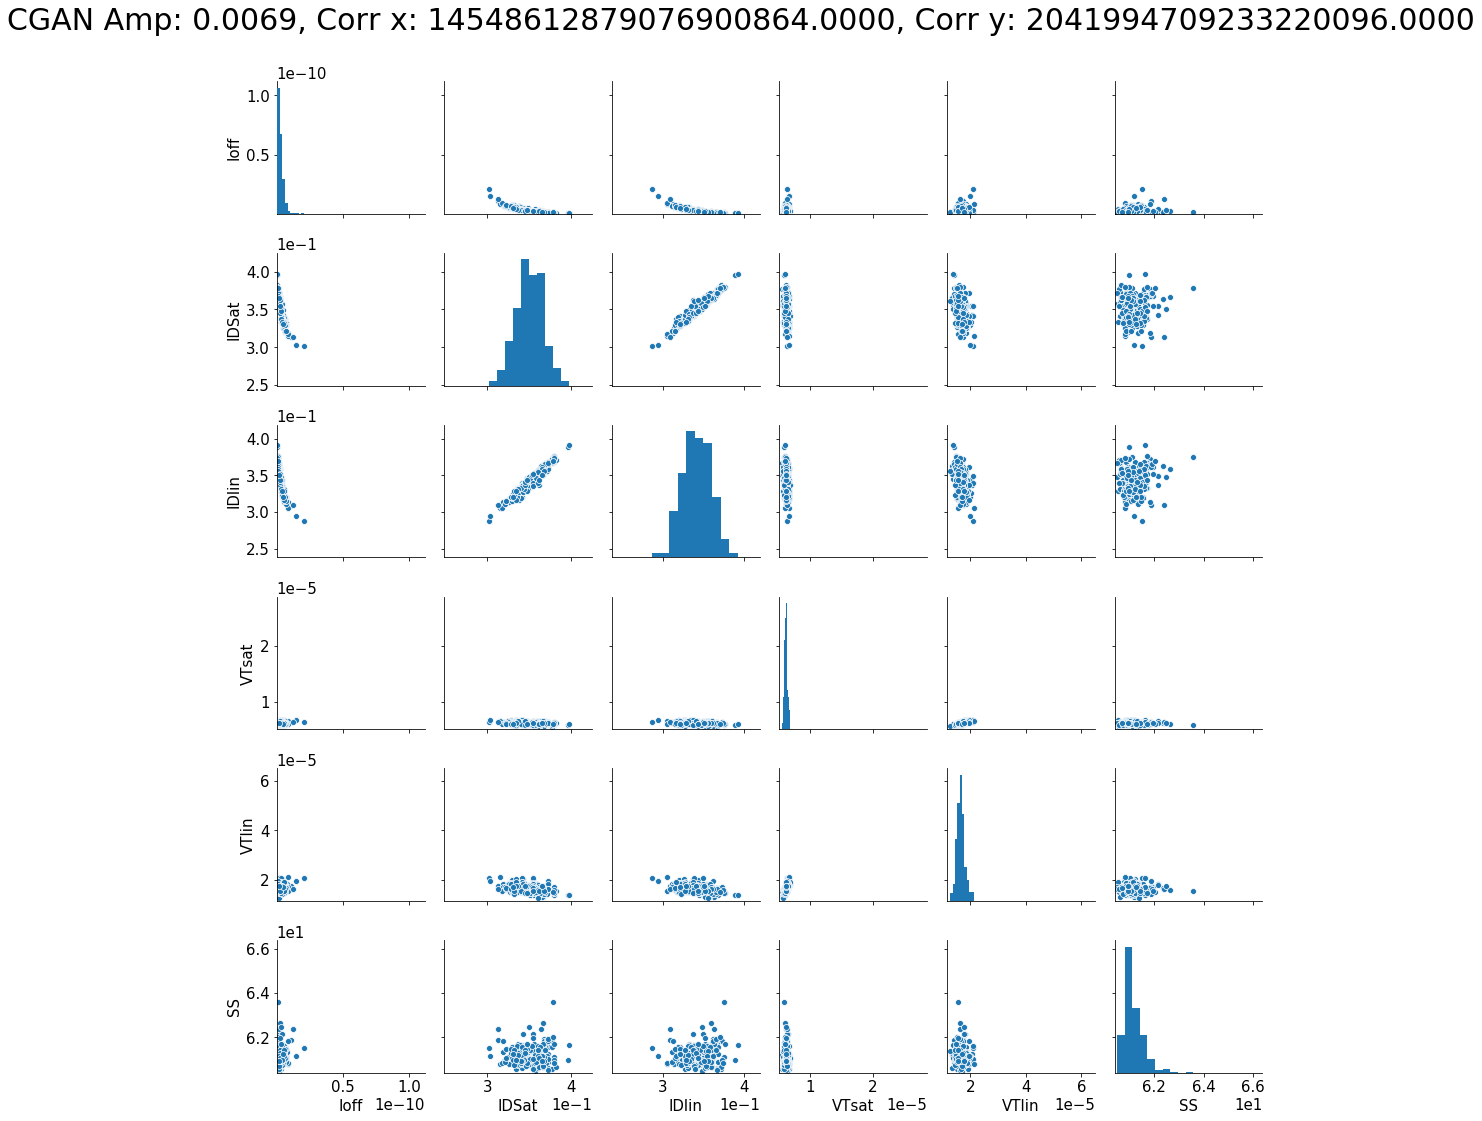

factor 2
real A sample shape: (250, 6)
X input [1.11500611e-02 5.83810867e+20 9.06778227e+19 3.58321489e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


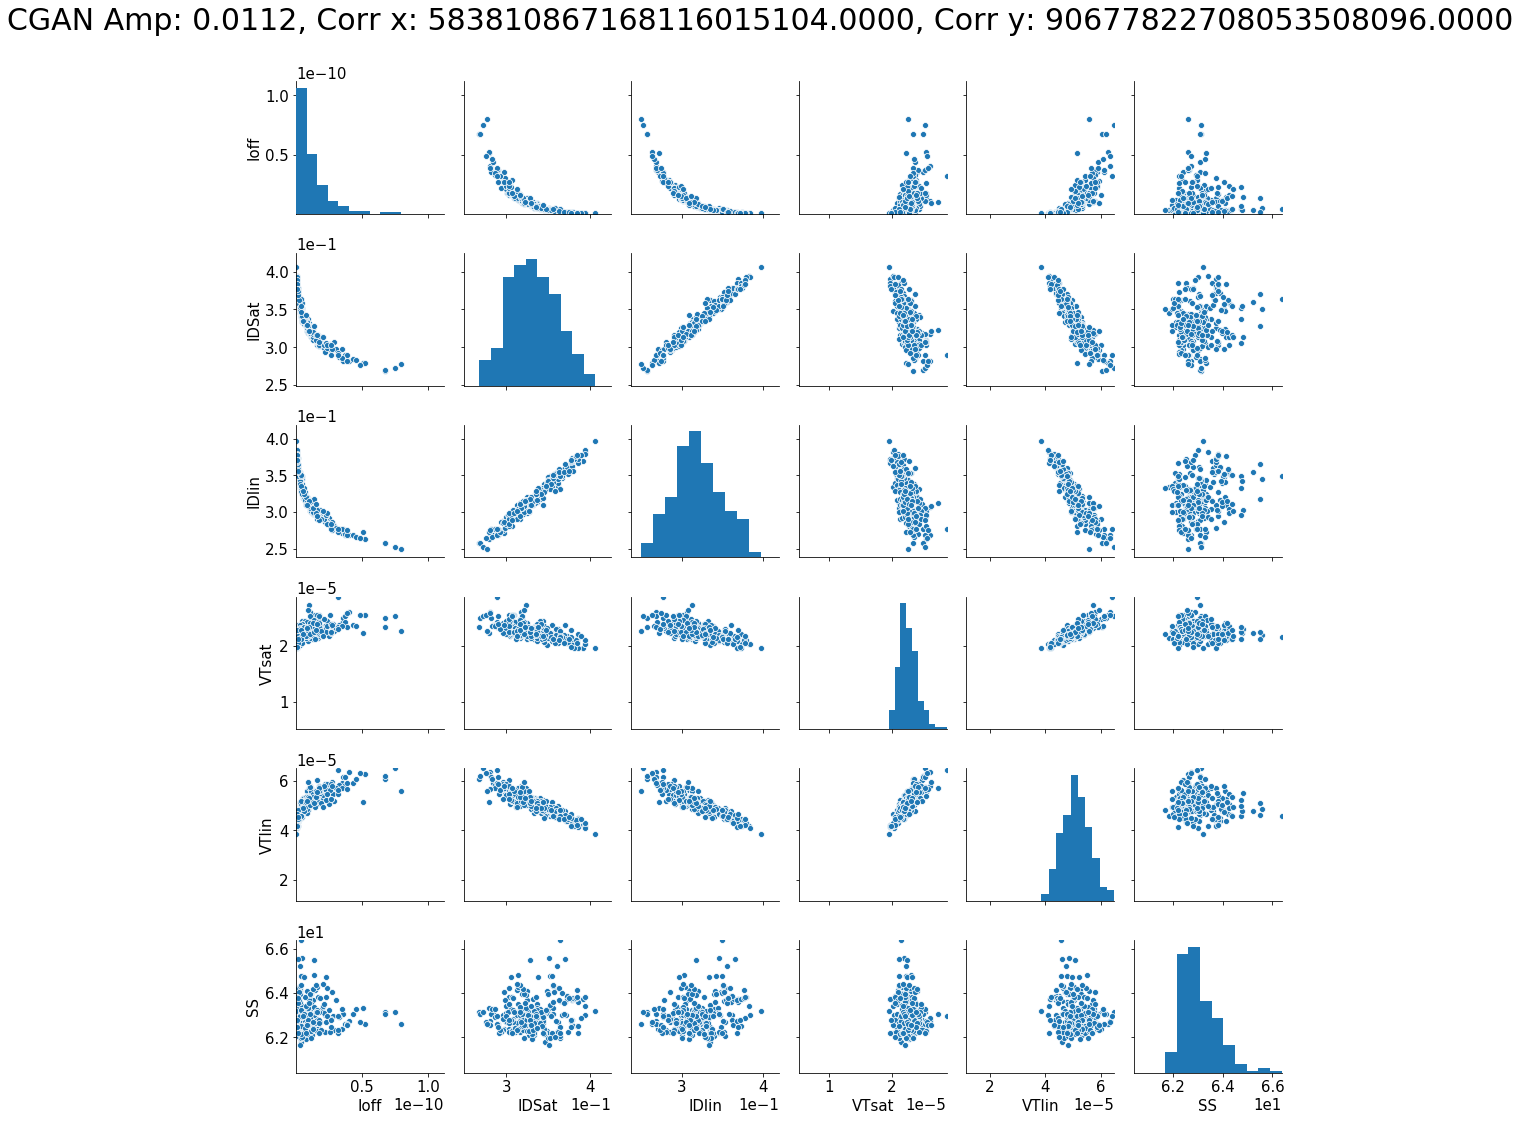

factor 3
real A sample shape: (250, 6)
X input [5.99569405e-03 3.11638597e+20 4.11084838e+19 3.28533776e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


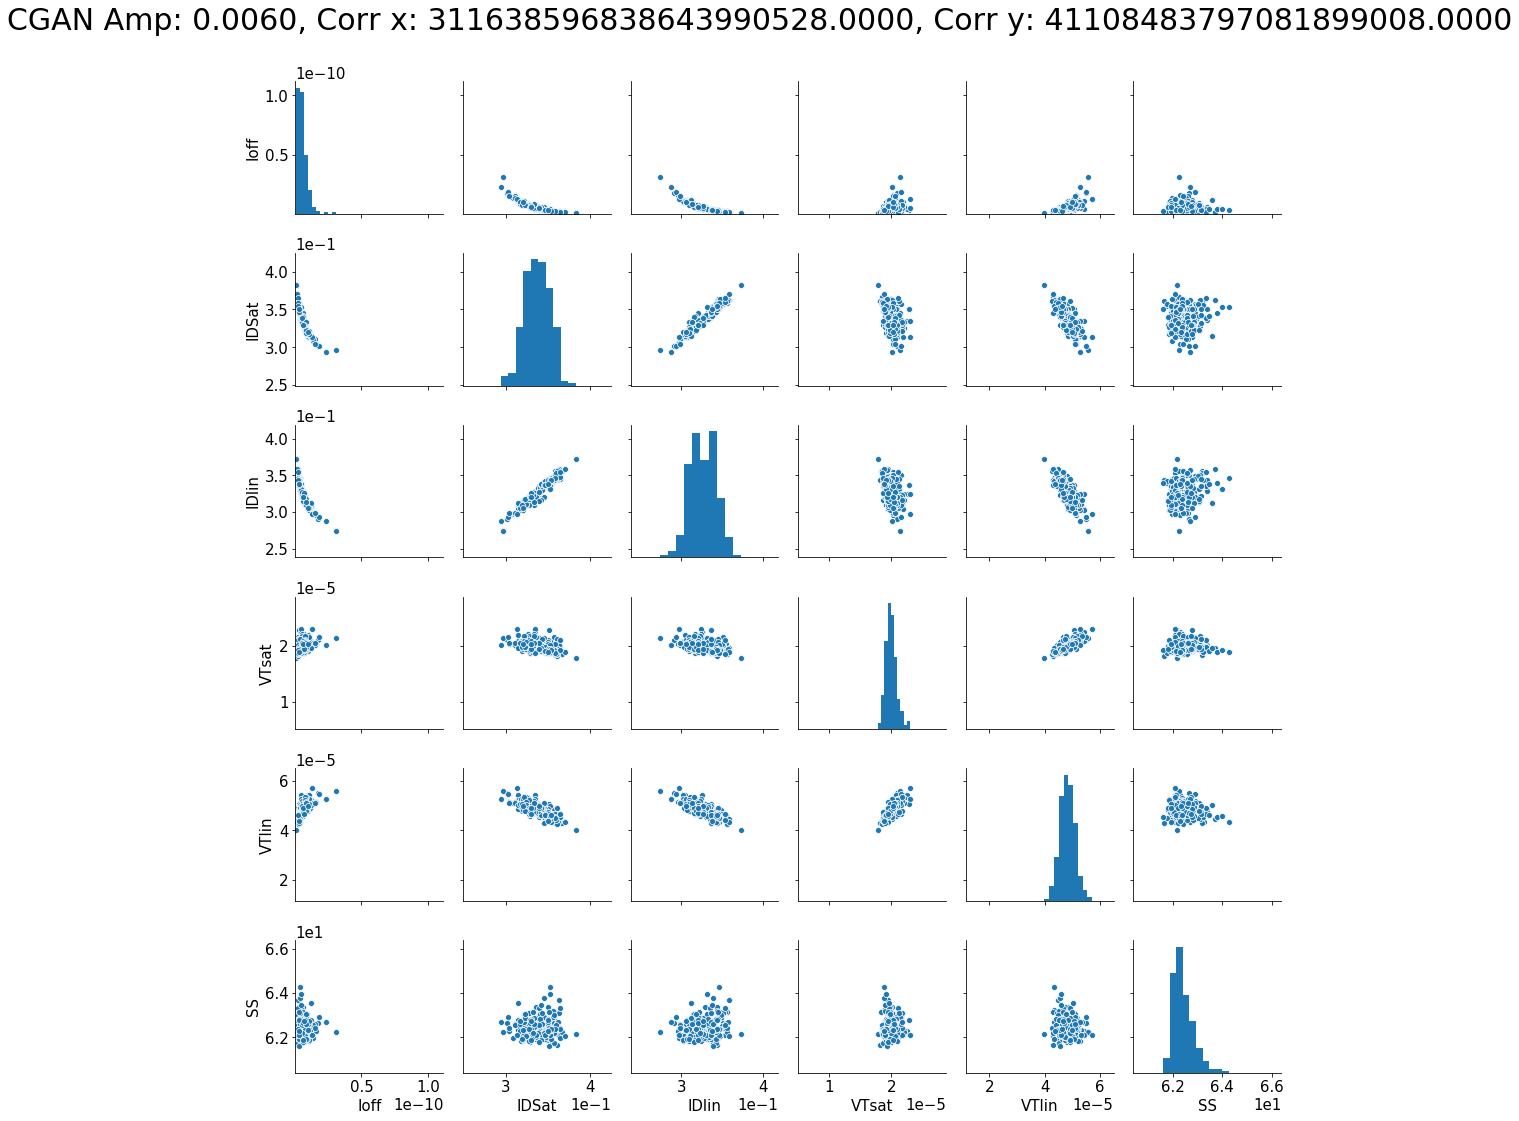

factor 4
real A sample shape: (250, 6)
X input [3.18145645e-03 2.78173540e+20 1.99814564e+19 3.62751273e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


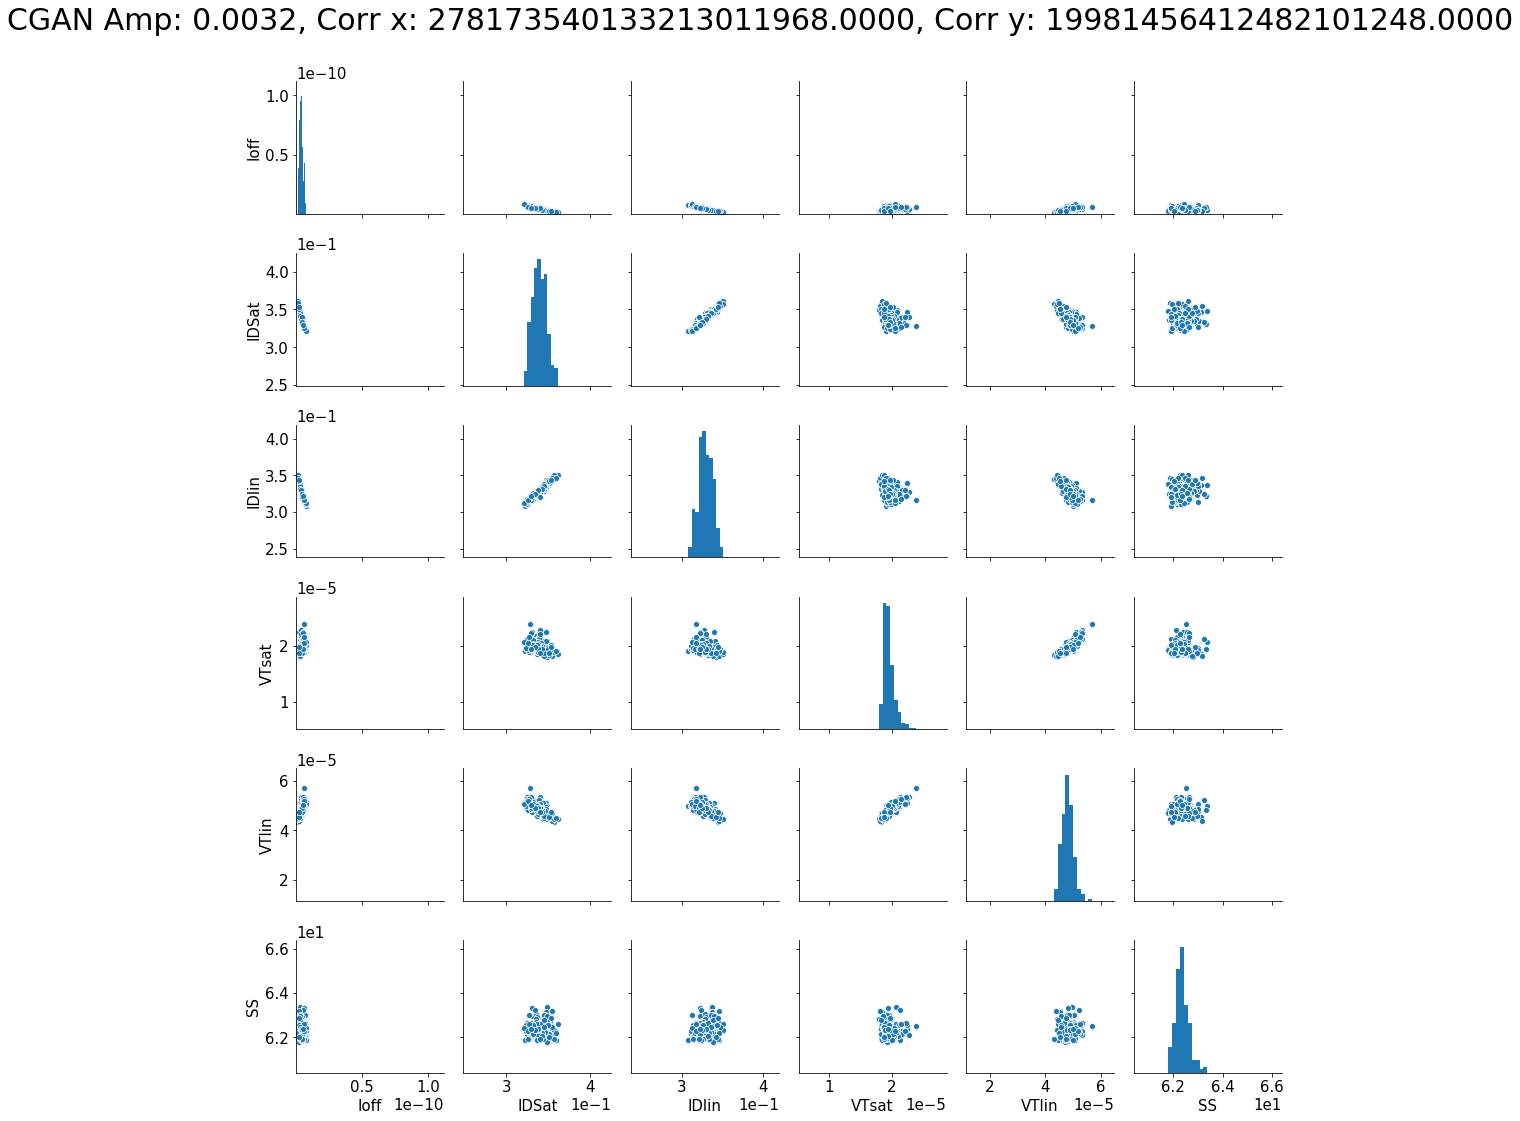

factor 5
real A sample shape: (250, 6)
X input [1.33051257e-02 2.12039947e+19 2.46494333e+18 3.61370649e-02
 0.00000000e+00 1.00000000e+00 1.00000000e+00]


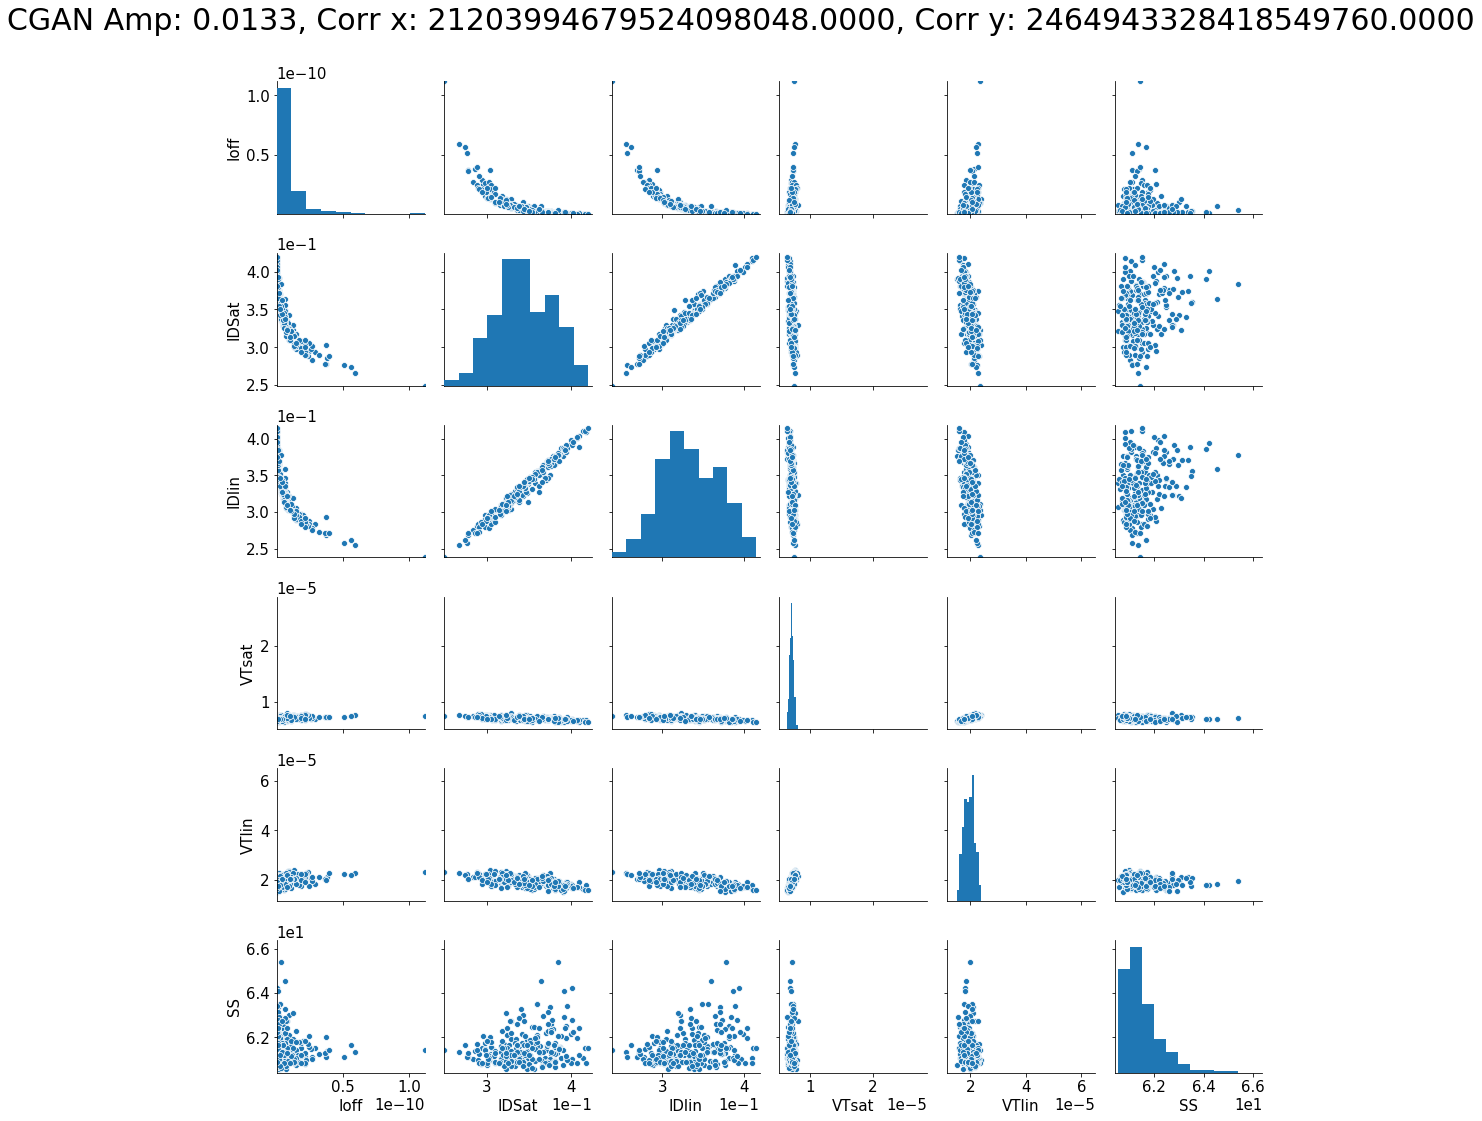

In [20]:
for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    test_real_A_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real A sample shape:", test_real_A_matrix_plot.shape)


    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(test_real_A_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS'])
    # print(df1)
    
#     print(np.min(test_min_list))
#     print(np.max(test_max_list, axis=1))
    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test)
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v[i], max_per_out_v[i]))
        g.axes[i,i].set_ylim((min_per_out_v[i], max_per_out_v[i]))
    
    for ax in g.axes.flatten():
        ax.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
    
    plt.rcParams.update({'font.size': 15})
    plt.tight_layout()
#     plt.savefig('figures/real_Test_same_factor_{}_sample_{}_seed_{}.pdf'.format(factor, test_gen_sample_num, seed), bbox_inches='tight', transparent=True, pad_inches=0)
    plt.show()
    
    ### 파란색이 real 주황색이 generated

# CCGAN motivation

In [4]:
# 검증의 시간
file_path = '2020_LER_20201102_testset_V04.xlsx'

data = np.load(file_path+'.npy', allow_pickle=True)
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]

print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)

total_sum = 0
for i in range(Y_all.shape[0]):
    print(i, Y_all[i])

# for i in range(Y_all.shape[0]):
#     if 
#     print(Y_all[i])

(2500, 5) (2500, 6) (10, 5) (10, 6)
0 [1.9580e-12 4.2420e-05 1.6180e-05 3.4300e-01 3.5300e-01 6.1501e+01]
1 [6.1350e-13 3.6300e-05 1.4500e-05 3.7000e-01 3.7700e-01 6.0804e+01]
2 [7.437e-13 3.182e-05 1.391e-05 3.700e-01 3.740e-01 6.120e+01]
3 [1.4790e-12 4.1000e-05 1.5990e-05 3.5200e-01 3.5800e-01 6.1429e+01]
4 [1.9260e-12 4.3930e-05 1.7650e-05 3.4400e-01 3.5300e-01 6.1569e+01]
5 [1.1990e-12 3.6920e-05 1.4540e-05 3.5600e-01 3.6300e-01 6.1272e+01]
6 [1.6050e-12 3.6600e-05 1.3990e-05 3.4900e-01 3.5500e-01 6.1348e+01]
7 [1.5290e-12 4.0250e-05 1.5810e-05 3.5000e-01 3.5700e-01 6.1406e+01]
8 [2.2580e-12 3.9540e-05 1.6170e-05 3.4200e-01 3.5100e-01 6.1827e+01]
9 [1.9230e-12 4.2050e-05 1.5870e-05 3.4500e-01 3.5300e-01 6.1627e+01]
10 [1.1800e-12 4.0380e-05 1.7000e-05 3.5500e-01 3.6300e-01 6.1232e+01]
11 [2.461e-12 4.101e-05 1.478e-05 3.390e-01 3.490e-01 6.173e+01]
12 [3.8970e-12 4.2100e-05 1.6900e-05 3.3100e-01 3.4100e-01 6.2348e+01]
13 [2.6110e-12 4.3680e-05 1.6380e-05 3.3700e-01 3.4800e-01 6.17

470 [1.6250e-12 4.2960e-05 1.6040e-05 3.4700e-01 3.5600e-01 6.1419e+01]
471 [2.9640e-12 4.0720e-05 1.6940e-05 3.3700e-01 3.4500e-01 6.2085e+01]
472 [2.3910e-12 4.3150e-05 1.6490e-05 3.4000e-01 3.4800e-01 6.1779e+01]
473 [2.4400e-12 4.2300e-05 1.7030e-05 3.4000e-01 3.4700e-01 6.1823e+01]
474 [3.2400e-12 4.3270e-05 1.6540e-05 3.3400e-01 3.4400e-01 6.2067e+01]
475 [9.9400e-13 3.5400e-05 1.4040e-05 3.6100e-01 3.6700e-01 6.1282e+01]
476 [1.616e-12 4.049e-05 1.637e-05 3.480e-01 3.560e-01 6.147e+01]
477 [2.7220e-12 4.4310e-05 1.7560e-05 3.3700e-01 3.4700e-01 6.1915e+01]
478 [2.136e-12 4.284e-05 1.641e-05 3.420e-01 3.510e-01 6.162e+01]
479 [3.7340e-12 4.1630e-05 1.6890e-05 3.3100e-01 3.4100e-01 6.2186e+01]
480 [2.0140e-12 3.9520e-05 1.6050e-05 3.4600e-01 3.5300e-01 6.1949e+01]
481 [1.2990e-12 4.0100e-05 1.5710e-05 3.5300e-01 3.6100e-01 6.1342e+01]
482 [1.7690e-12 3.9310e-05 1.5100e-05 3.4800e-01 3.5700e-01 6.1726e+01]
483 [1.3310e-12 3.9290e-05 1.4820e-05 3.5100e-01 3.6000e-01 6.1201e+01]
484 

1078 [1.9630e-12 4.2040e-05 1.6670e-05 3.4400e-01 3.5300e-01 6.1599e+01]
1079 [4.3780e-12 4.3060e-05 1.7470e-05 3.2800e-01 3.3900e-01 6.2566e+01]
1080 [2.1660e-12 4.2470e-05 1.7040e-05 3.4200e-01 3.5100e-01 6.1608e+01]
1081 [3.8530e-12 4.2650e-05 1.7510e-05 3.3100e-01 3.4200e-01 6.2398e+01]
1082 [2.1580e-12 4.2550e-05 1.6270e-05 3.4200e-01 3.5100e-01 6.1685e+01]
1083 [2.9790e-12 4.3210e-05 1.7040e-05 3.3600e-01 3.4500e-01 6.2104e+01]
1084 [2.2720e-12 4.1460e-05 1.6530e-05 3.4200e-01 3.4900e-01 6.1741e+01]
1085 [2.9120e-12 4.0320e-05 1.5790e-05 3.3700e-01 3.4500e-01 6.1947e+01]
1086 [2.5580e-12 4.1800e-05 1.5980e-05 3.3800e-01 3.4800e-01 6.1764e+01]
1087 [2.0220e-12 3.9520e-05 1.6390e-05 3.4400e-01 3.5100e-01 6.1584e+01]
1088 [2.0300e-12 4.1850e-05 1.6460e-05 3.4300e-01 3.5200e-01 6.1623e+01]
1089 [1.787e-12 4.109e-05 1.659e-05 3.460e-01 3.540e-01 6.152e+01]
1090 [2.5920e-12 4.1490e-05 1.6660e-05 3.4000e-01 3.4700e-01 6.2022e+01]
1091 [1.1410e-12 3.6390e-05 1.4570e-05 3.5700e-01 3.6200e

1600 [2.0950e-12 4.2090e-05 1.6490e-05 3.4300e-01 3.5000e-01 6.1617e+01]
1601 [2.4210e-12 4.3050e-05 1.6790e-05 3.4000e-01 3.4700e-01 6.1762e+01]
1602 [2.5330e-12 4.2840e-05 1.6580e-05 3.3800e-01 3.4700e-01 6.1762e+01]
1603 [1.9400e-12 4.2790e-05 1.6370e-05 3.4400e-01 3.5100e-01 6.1501e+01]
1604 [1.9790e-12 4.1670e-05 1.6580e-05 3.4400e-01 3.5100e-01 6.1577e+01]
1605 [2.5510e-12 4.2940e-05 1.6810e-05 3.3800e-01 3.4700e-01 6.1757e+01]
1606 [2.1290e-12 4.3020e-05 1.6580e-05 3.4200e-01 3.4900e-01 6.1602e+01]
1607 [2.0600e-12 4.2420e-05 1.6360e-05 3.4300e-01 3.5000e-01 6.1593e+01]
1608 [2.3550e-12 4.3060e-05 1.6600e-05 3.4000e-01 3.4800e-01 6.1664e+01]
1609 [2.6830e-12 4.3060e-05 1.6800e-05 3.3700e-01 3.4600e-01 6.1818e+01]
1610 [2.0070e-12 4.2110e-05 1.6460e-05 3.4300e-01 3.5000e-01 6.1566e+01]
1611 [2.1660e-12 4.1780e-05 1.6120e-05 3.4200e-01 3.4900e-01 6.1634e+01]
1612 [1.6820e-12 4.1440e-05 1.6050e-05 3.4700e-01 3.5400e-01 6.1373e+01]
1613 [2.5880e-12 4.3130e-05 1.6970e-05 3.3800e-01 3

2119 [1.866e-12 4.149e-05 1.613e-05 3.450e-01 3.520e-01 6.149e+01]
2120 [2.2020e-12 4.2700e-05 1.6440e-05 3.4200e-01 3.4900e-01 6.1764e+01]
2121 [1.8600e-12 4.2050e-05 1.5800e-05 3.4500e-01 3.5300e-01 6.1514e+01]
2122 [2.7120e-12 4.3250e-05 1.7030e-05 3.3800e-01 3.4600e-01 6.1911e+01]
2123 [2.7650e-12 4.2960e-05 1.7150e-05 3.3700e-01 3.4500e-01 6.1884e+01]
2124 [2.192e-12 4.297e-05 1.631e-05 3.400e-01 3.490e-01 6.154e+01]
2125 [2.8140e-12 4.2250e-05 1.6630e-05 3.3700e-01 3.4500e-01 6.1903e+01]
2126 [2.502e-12 4.356e-05 1.729e-05 3.390e-01 3.470e-01 6.176e+01]
2127 [2.4160e-12 4.3390e-05 1.6620e-05 3.3900e-01 3.4700e-01 6.1712e+01]
2128 [1.8980e-12 4.2420e-05 1.6280e-05 3.4500e-01 3.5200e-01 6.1522e+01]
2129 [2.8010e-12 4.2440e-05 1.6840e-05 3.3700e-01 3.4500e-01 6.1959e+01]
2130 [1.5760e-12 4.0200e-05 1.5340e-05 3.4900e-01 3.5600e-01 6.1393e+01]
2131 [2.144e-12 4.325e-05 1.681e-05 3.420e-01 3.490e-01 6.162e+01]
2132 [2.0520e-12 4.2160e-05 1.6590e-05 3.4300e-01 3.5000e-01 6.1601e+01]
21

In [58]:
for i in range(X_all.shape[0]):
    print(i, X_all[i])

0 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
1 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
2 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
3 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
4 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
5 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
6 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
7 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
8 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
9 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
10 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
11 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
12 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
13 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
14 [  0.62484672  17.00743225 

497 [ 0.55654727 80.91905766 80.56986979  1.          0.        ]
498 [ 0.55654727 80.91905766 80.56986979  1.          0.        ]
499 [ 0.55654727 80.91905766 80.56986979  1.          0.        ]
500 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
501 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
502 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
503 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
504 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
505 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
506 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
507 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
508 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
509 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
510 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
511 [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
512 [ 0.50

1135 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1136 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1137 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1138 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1139 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1140 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1141 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1142 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1143 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1144 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1145 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1146 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1147 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1148 [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
1149 [ 0.63730798 69.14860261 65.33037708  1.          0.     

1973 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1974 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1975 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1976 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1977 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1978 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1979 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1980 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1981 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1982 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1983 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1984 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1985 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1986 [ 0.68988283 85.08858437 80.98368203  1.          0.        ]
1987 [ 0.68988283 85.08858437 80.98368203  1.          0.     

In [87]:
def chamfer_loss(x, y):
    
    total = 0
    
#     print(x)
#     print(y)
    
    for i in range(x.shape[0]):
        
        x_element = x[i]
        
        # min in y
        dist_l2 = np.linalg.norm(y-x_element.reshape(1,-5), axis=1)
        sort_list = dist_l2.argsort()
        
        # dist
        dist = np.linalg.norm(x_element-y[sort_list[0]])
        
        total += dist
        
    for j in range(y.shape[0]):
        
        y_element = y[j]
        
        # min in x
        dist_l2 = np.linalg.norm(x-y_element.reshape(1,-5), axis=1)
        sort_list = dist_l2.argsort()
        
        # dist
        dist = np.linalg.norm(y_element-x[sort_list[0]])
        
        total += dist
    
    return total

# main

num_in_cycle = 250

for i in range(X_per_cycle.shape[0]):
    print("standard test", i, X_per_cycle[i])
    
    standard = X_per_cycle[i]
    y_standard = Y_all[i*num_in_cycle:(i+1)*num_in_cycle]


#     print(standard.reshape(1, -5).shape)
#     print(comparative_group.shape)
    dist_l2 = np.linalg.norm(X_per_cycle-standard.reshape(1,-5), axis=1)
    
#     print(dist_l2)
    sort_list = dist_l2.argsort()[1:]
#     print(sort_list)

    y_comparative_group = np.array([Y_all[j*num_in_cycle:(j+1)*num_in_cycle] for j in sort_list])    
    
    dist_list = []
    
    for j in range(y_comparative_group.shape[0]):
        y_list = y_comparative_group[j]
        
        print("compare")
        print("compare test num: ", sort_list[j])
        print("x distance: ", dist_l2[sort_list[j]])
        print("compare test LER: ", X_per_cycle[sort_list[j]])
#         print(y_list.shape)
        dist = chamfer_loss(y_standard, y_list)
        print("y distance: ", dist)
        dist_list.append(dist)
        
    print(dist_list)

standard test 0 [  0.62484672  17.00743225 173.85718891   1.           0.        ]
compare
compare test num:  5
x distance:  79.04845536185128
compare test LER:  [  0.72951307  89.39156879 205.62484728   1.           0.        ]
y distance:  5.277766647414941
compare
compare test num:  9
x distance:  80.7294905713936
compare test LER:  [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]
y distance:  37.89161001880581
compare
compare test num:  3
x distance:  104.79869773279273
compare test LER:  [ 0.56045148 25.42868151 69.39740975  1.          0.        ]
y distance:  3.7647346417601106
compare
compare test num:  2
x distance:  110.48383152073485
compare test LER:  [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
y distance:  4.637806349898956
compare
compare test num:  1
x distance:  113.08061033926386
compare test LER:  [ 0.55654727 80.91905766 80.56986979  1.          0.        ]
y distance:  4.960023581507302
compare
compare test num:  7
x di

y distance:  4.6411597149153065
compare
compare test num:  1
x distance:  125.34177578742819
compare test LER:  [ 0.55654727 80.91905766 80.56986979  1.          0.        ]
y distance:  6.723976741066954
compare
compare test num:  4
x distance:  141.74739697881938
compare test LER:  [ 0.63730798 69.14860261 65.33037708  1.          0.        ]
y distance:  5.176782044456453
compare
compare test num:  2
x distance:  143.54215369291572
compare test LER:  [ 0.50466944 48.62398816 67.99380535  1.          0.        ]
y distance:  7.566801081214641
compare
compare test num:  3
x distance:  150.49649253700915
compare test LER:  [ 0.56045148 25.42868151 69.39740975  1.          0.        ]
y distance:  5.835833133666554
compare
compare test num:  6
x distance:  167.91522962183373
compare test LER:  [ 0.15273618 23.32639122 51.25326965  1.          0.        ]
y distance:  48.394521216329544
compare
compare test num:  8
x distance:  177.89570485852292
compare test LER:  [ 0.25925637 78.126537

In [71]:
comparative_group = np.array([X_per_cycle[j] for j in range(X_per_cycle.shape[0])  if j != i])

print(comparative_group)

print(comparative_group[0])
print(X_all.shape)
print([comparative_group[0][0] == X_all[:,0]])
print(Y_all)
print(Y_all[comparative_group[0][0] != X_all[:,0]])

[[6.24846719e-01 1.70074323e+01 1.73857189e+02 1.00000000e+00
  0.00000000e+00]
 [5.56547266e-01 8.09190577e+01 8.05698698e+01 1.00000000e+00
  0.00000000e+00]
 [5.04669444e-01 4.86239882e+01 6.79938054e+01 1.00000000e+00
  0.00000000e+00]
 [5.60451484e-01 2.54286815e+01 6.93974098e+01 1.00000000e+00
  0.00000000e+00]
 [6.37307984e-01 6.91486026e+01 6.53303771e+01 1.00000000e+00
  0.00000000e+00]
 [7.29513070e-01 8.93915688e+01 2.05624847e+02 1.00000000e+00
  0.00000000e+00]
 [1.52736183e-01 2.33263912e+01 5.12532696e+01 1.00000000e+00
  0.00000000e+00]
 [6.89882826e-01 8.50885844e+01 8.09836820e+01 1.00000000e+00
  0.00000000e+00]
 [2.59256367e-01 7.81265376e+01 2.80867958e+01 1.00000000e+00
  0.00000000e+00]
 [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
  0.00000000e+00]]
[  0.62484672  17.00743225 173.85718891   1.           0.        ]
(2500, 5)
[array([ True,  True,  True, ..., False, False, False])]
[[1.9580e-12 4.2420e-05 1.6180e-05 3.4300e-01 3.5300e-01 6.1501e+